## Clean text data

In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Tokenize words

In [2]:
# Run only if this is the first ever time using nltk
# nltk.download()

In [3]:
df = pd.read_csv("data_set.csv")
df.head()

,id_str,screen_name,created_at,latitude,longitude,text
0,29292924,queeraspoetry,Sun May 06 20:33:41 +0000 2018,19.560340,-154.986600,Good am! 🤙🌋 @ Center for Spiritual Living in H...
1,414227956,NaomiCooper808,Sun May 06 20:09:43 +0000 2018,20.020278,-155.667778,"#vacay #Ladat @ Waimea, Hawaii County, Hawai"
2,20112512,vioart527,Sun May 06 19:46:08 +0000 2018,19.650000,-155.994000,"Last sunset in Hawaii . . . until next time,"
3,18645703,syvideo,Sun May 06 18:18:05 +0000 2018,19.473500,-154.920000,"Adventures of covering lava flow on Hilo, HI. ..."
4,18829708,rodney_o,Sun May 06 18:15:13 +0000 2018,19.204109,-155.479005,Breakfast in Pahala. Leftovers and @rustyshawa...


In [7]:
#nltk.download('punkt')
data = [nltk.sent_tokenize(str(item)) for item in df["text"]]

In [ ]:
tokens = [nltk.word_tokenize(item) for item in df["text"].values]
tokens

### Remove punctuation

In [11]:
import string
import re

regex = re.compile(f'[{re.escape(string.punctuation)}]')

tokens_without_punctuation = [regex.sub(u'', word) for words in data for word in words if not regex.sub(u'', word) == u'']
tokens_without_punctuation[:10]

['Good am',
 '🤙🌋  Center for Spiritual Living in Hawai',
 'vacay Ladat  Waimea Hawaii County Hawai',
 'Last sunset in Hawaii ',
 'until next time',
 'Adventures of covering lava flow on Hilo HI',
 ' Leilani Estates Hawai',
 'Breakfast in Pahala',
 'Leftovers and rustyshawaiian coffee',
 ' Pahala Hawai']

### Remove stop words

In [12]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
stop_words.append("via")
stop_words

words = [token for token in tokens_without_punctuation if token not in stop_words]
words[:15]

['Good am',
 '🤙🌋  Center for Spiritual Living in Hawai',
 'vacay Ladat  Waimea Hawaii County Hawai',
 'Last sunset in Hawaii ',
 'until next time',
 'Adventures of covering lava flow on Hilo HI',
 ' Leilani Estates Hawai',
 'Breakfast in Pahala',
 'Leftovers and rustyshawaiian coffee',
 ' Pahala Hawai',
 'this is my home now🍃  Napoopoo Hawai',
 'Hawaii Round 1 12 hours on an airplane earthquakes and volcano eruptions',
 'This little gecko joined us for a drink',
 '☺️  KailuaKona Hawai',
 'timelapse of the sunset today 🌅 Hawaii holiday myphonegottakenoutbyawave']

### Remove links

In [13]:
import re
    
regex = re.compile('http\S+')

tokens_without_links = [regex.sub(u'', word) for word in words if not regex.sub(u'', word) == u'' and not word.startswith("tc")]
tokens_without_links[:20]

['Good am',
 '🤙🌋  Center for Spiritual Living in Hawai',
 'vacay Ladat  Waimea Hawaii County Hawai',
 'Last sunset in Hawaii ',
 'until next time',
 'Adventures of covering lava flow on Hilo HI',
 ' Leilani Estates Hawai',
 'Breakfast in Pahala',
 'Leftovers and rustyshawaiian coffee',
 ' Pahala Hawai',
 'this is my home now🍃  Napoopoo Hawai',
 'Hawaii Round 1 12 hours on an airplane earthquakes and volcano eruptions',
 'This little gecko joined us for a drink',
 '☺️  KailuaKona Hawai',
 'timelapse of the sunset today 🌅 Hawaii holiday myphonegottakenoutbyawave',
 'cousins ChristensenVaca2018 TheShaws  Waimea Hawaii County Hawai',
 'Five homes confirmed destroyed by lava flow on Big Island of Hawaii',
 'Here’s a look at the vents steaming in the eve',
 'bigislandlove hawaii bigisland maunalani whatabeautifulworld luckyme',
 'Free OluKai shoes thanks Nu Skin']

### Stem words

In [14]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_words = [stemmer.stem(word) for word in tokens_without_links]
stemmed_words[:10]

['good am',
 '🤙🌋  center for spiritual living in hawai',
 'vacay ladat  waimea hawaii county hawai',
 'last sunset in hawaii ',
 'until next tim',
 'adventures of covering lava flow on hilo hi',
 ' leilani estates hawai',
 'breakfast in pahala',
 'leftovers and rustyshawaiian coffe',
 ' pahala hawai']

In [15]:
from collections import Counter

counter = Counter(stemmed_words)
counter.most_common(20)

[('champions tennis circuit featuring legends agassi sampras mcenroe roddick',
  5),
 ('aloha from maui ', 5),
 (' hilo hawai', 4),
 ('aloha', 4),
 ('traveling cr', 4),
 ('maui', 4),
 (' kihei hawai', 4),
 (' pahala hawai', 3),
 (' kailuakona hawai', 3),
 ('im at kahului airport in kahului h', 3),
 ('yum', 3),
 ('thi', 3),
 (' lahaina hawai', 3),
 ('I', 3),
 (' kaanapali hawai', 3),
 ('honeymoonconfectionery  kaanapali hawai', 3),
 ('our heartwarming special juice blend today  my chai juice blend r', 3),
 ('happy aloha maui friday', 3),
 ('have a great weekend everyon', 3),
 (' kauhale maka', 3)]

In [16]:
def plot_words(words, values):
    indexes = np.arange(len(words))
    plt.xticks(indexes, words, rotation=90)
    plt.bar(indexes, values)

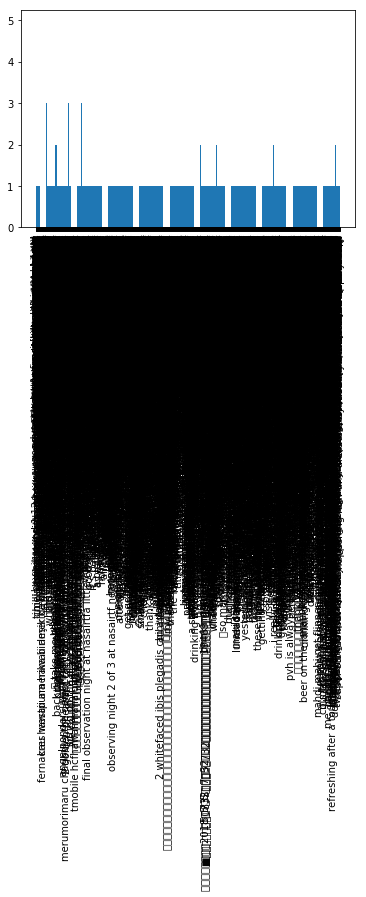

In [17]:
plot_words(counter.keys(), counter.values())

In [18]:
most_common_words = [word for word, _ in counter.most_common(20)]
most_common_values = [count for _, count in counter.most_common(20)]

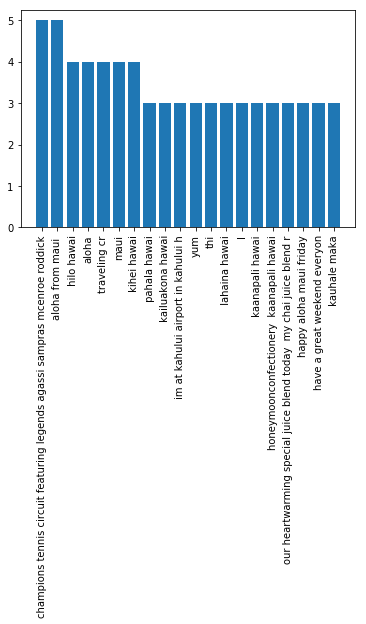

In [19]:
plot_words(most_common_words, most_common_values)

### Lemmatize words

In [63]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens_without_links]
lemmatized_words[:20]

['Host',
 'Website',
 'Azure',
 'Functions',
 'NodeJS',
 'Part',
 '2',
 'Logging',
 'wintellectuals',
 'dotnet',
 'DotNetKicks',
 'CsharpCorner',
 'pmohammedramees',
 'mcbeniwal',
 'stratisplatform',
 'graphitegtc',
 'infragistics',
 'glutoken',
 'jetbrains',
 'GrapeCityUS']

In [57]:
lemmatized_counter = Counter(lemmatized_words)
lemmatized_counter.most_common(20)

[('Wintellect', 15),
 ('CsharpCorner', 9),
 ('stratisplatform', 8),
 ('Data', 8),
 ('graphitegtc', 7),
 ('infragistics', 7),
 ('glutoken', 7),
 ('Host', 6),
 ('Website', 6),
 ('Azure', 6),
 ('Functions', 6),
 ('NodeJS', 6),
 ('Part', 6),
 ('jetbrains', 6),
 ('jprosise', 6),
 ('wintellectuals', 5),
 ('dotnet', 5),
 ('DotNetKicks', 5),
 ('mcbeniwal', 5),
 ('1', 5)]

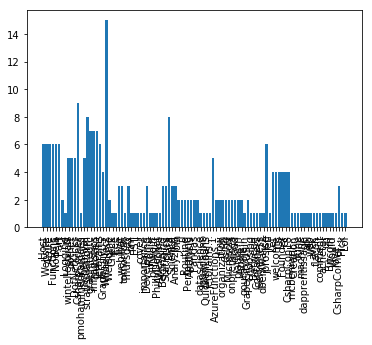

In [58]:
plot_words(lemmatized_counter.keys(), lemmatized_counter.values())

In [59]:
most_common_words = [word for word, _ in lemmatized_counter.most_common(20)]
most_common_values = [count for _, count in lemmatized_counter.most_common(20)]

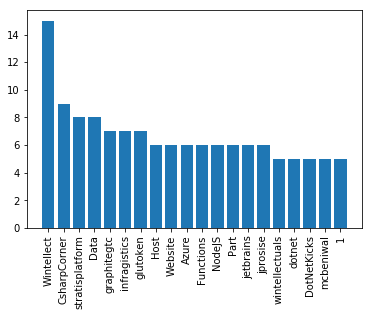

In [60]:
plot_words(most_common_words, most_common_values)

In [61]:
pd.DataFrame({
    "words": lemmatized_words
}).to_csv("words.csv", index=False, encoding="UTF-8")